# Template for a Data Science & IA Bootcamp

---

## Sección 0.  Configuración inicial

In [5]:
# Importación de librerías actualizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import os

# Configuraciones generales
%matplotlib inline
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

---

## Sección 1: Flexibilidad y Generalización

### 1.1. Parámetros configurables

Definimos los parámetros que el usuario puede configurar para la aplicación.

In [6]:
# Parámetros configurables
RUTA_ARCHIVO = '../resources/weight-height.csv'     # Reemplaza con la ruta a tu archivo
SEPARADOR = ','                                     # Cambia el separador si es necesario (por ejemplo, ';' para archivos CSV europeos)
ENCODING = 'utf-8'                                  # Especifica la codificación del archivo si es necesario

### 1.2. Función para Cargar los datos
Creamos una función que detecte el formato del archivo y lo cargue adecuadamente.

In [7]:
def cargar_datos(ruta_archivo, separador=',', encoding='utf-8'):
    """
    Carga datos desde un archivo CSV, Excel o JSON.
    
    Parámetros:
        ruta_archivo (str): Ruta al archivo de datos.
        separador (str): Separador utilizado en el archivo CSV.
        encoding (str): Codificación del archivo.
        
    Retorna:
        DataFrame de pandas con los datos cargados.
    """
    extension = os.path.splitext(ruta_archivo)[1].lower()
    if extension == '.csv':
        df = pd.read_csv(ruta_archivo, sep=separador, encoding=encoding)
    elif extension in ['.xls', '.xlsx']:
        df = pd.read_excel(ruta_archivo)
    elif extension == '.json':
        df = pd.read_json(ruta_archivo)
    else:
        raise ValueError("Formato de archivo no soportado. Utiliza CSV, Excel o JSON.")
    return df

### 1.3. Carga de Datos
Utilizamos la función para cargar datos.

In [8]:
# Cargar datos
df = cargar_datos(RUTA_ARCHIVO, SEPARADOR, ENCODING)

---


## Sección 2: Análisis Exploratorio de Datos (EDA)

### 2.1. Información General del Dataset

Obtenemos información básica sobre el dataset.


In [9]:
# Dimensiones del dataset
print(f"El dataset contiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# Vista previa de los datos
df.head()


El dataset contiene 10000 filas y 3 columnas.


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### 2.2. Tipos de Datos
Revisamos los tipos de datos de cada columna.

In [10]:
# Tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


### 2.3. Estadísticas Descriptivas


#### 2.3.1. Variables Numéticas

In [11]:
# Estadísticas descriptivas de variables numéricas
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


#### 2.3.2. Variables Categóricas

In [12]:
# Estadísticas descriptivas de variables categóricas
df.describe(include=['object', 'category'])


,Gender
count,10000
unique,2
top,Male
freq,5000


### 2.4 Valores Nulos
Creamos una función para resumir los valores nulos.

In [13]:
def resumen_valores_nulos(df):
    nulos = df.isnull().sum()
    porcentaje = (nulos / len(df)) * 100
    resumen = pd.DataFrame({'Valores Nulos': nulos, 'Porcentaje (%)': porcentaje})
    resumen = resumen[resumen['Valores Nulos'] > 0].sort_values('Porcentaje (%)', ascending=False)
    return resumen

# Uso de la función
resumen_nulos = resumen_valores_nulos(df)
resumen_nulos


,Valores Nulos,Porcentaje (%)


### 2.5. Visualizaciones Iniciales

#### 2.5.1. Variables Numéricas
Creamos una función para graficar histogramas y diagramas de caja para variables numéricas.

/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


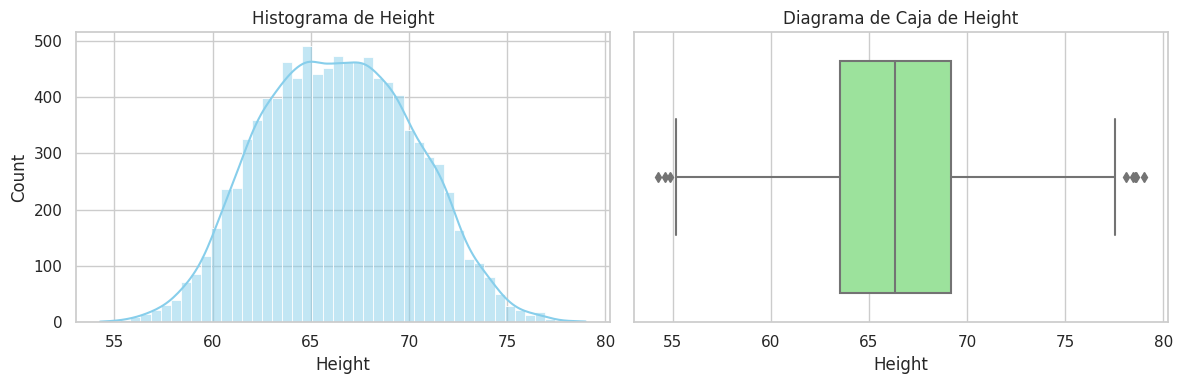

/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


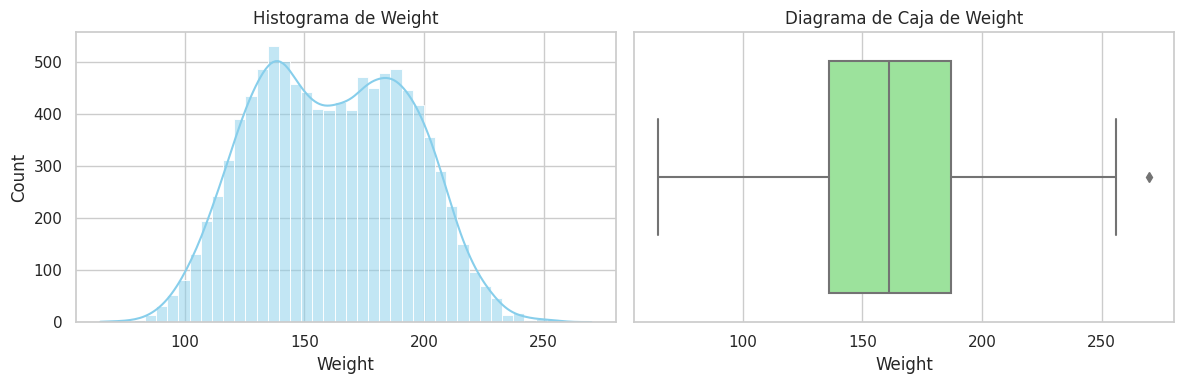

In [14]:
def graficar_variables_numericas(df):
    numericas = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numericas:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        sns.histplot(df[col].dropna(), ax=axes[0], kde=True, color='skyblue')
        axes[0].set_title(f'Histograma de {col}')
        sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
        axes[1].set_title(f'Diagrama de Caja de {col}')
        plt.tight_layout()
        plt.show()

# Uso de la función
graficar_variables_numericas(df)


#### 2.5.2. Variables Categóricas
Graficamos las frecuencias de las variables categóricas.

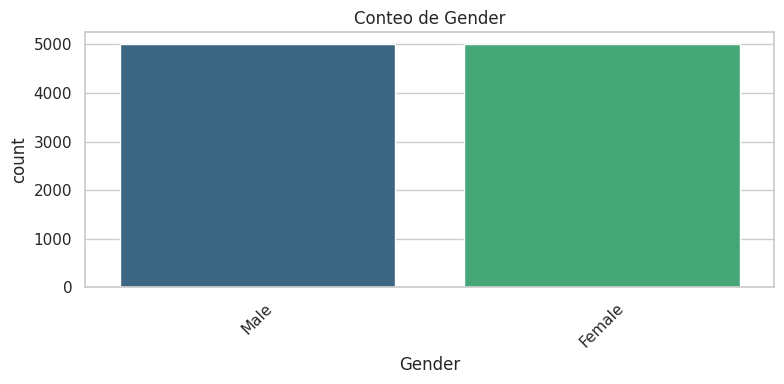

In [15]:
def graficar_variables_categoricas(df):
    categoricas = df.select_dtypes(include=['object', 'category']).columns
    for col in categoricas:
        plt.figure(figsize=(8, 4))
        orden = df[col].value_counts().index
        sns.countplot(data=df, x=col, order=orden, palette='viridis')
        plt.xticks(rotation=45)
        plt.title(f'Conteo de {col}')
        plt.tight_layout()
        plt.show()

# Uso de la función
graficar_variables_categoricas(df)


### 2.6. Matriz de Correlación
Calculamos y visualizamos la matriz de correlación.

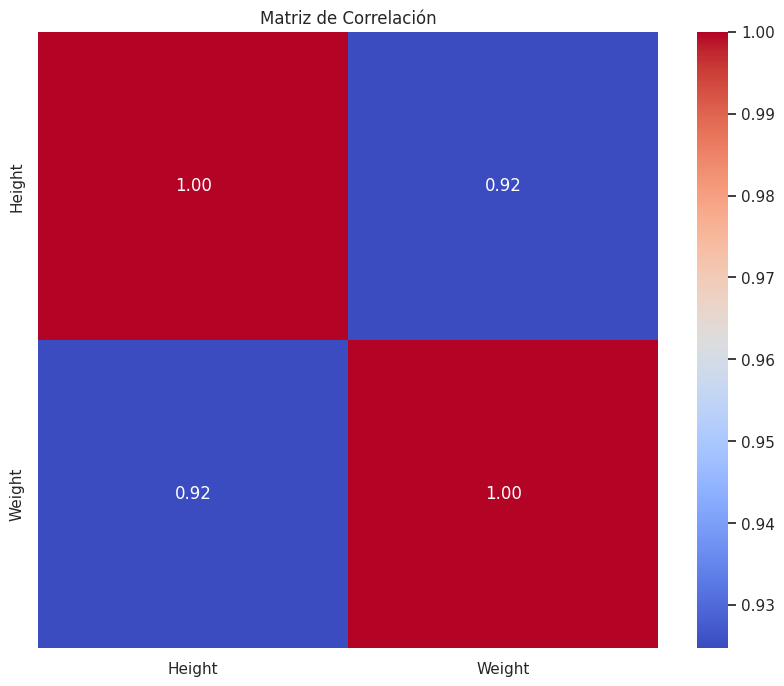

In [16]:
# Matriz de correlación
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Visualización
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


### 2.7. Detección de Valores Atípicos
Implementamos la detección de outliers usando el rango intercuartílico (IQR).

In [17]:
def detectar_outliers_iqr(df):
    numericas = df.select_dtypes(include=['int64', 'float64']).columns
    outliers = {}
    for col in numericas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        outliers_col = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
        outliers[col] = outliers_col
        print(f"{col}: {len(outliers_col)} outliers detectados.")
    return outliers

# Uso de la función
outliers_detectados = detectar_outliers_iqr(df)


Height: 8 outliers detectados.
Weight: 1 outliers detectados.


---


## Sección 3: Preprocesamiento de Datos

#### 3.1. Manejo de Valores Nulos
Implemantamos estrategias para manejar valores nulos en nuestros datos.

##### 3.1.1. Imputación de Variables Numéricas

In [18]:
def imputar_numericas(df, metodo='media'):
    numericas = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numericas:
        if df[col].isnull().sum() > 0:
            if metodo == 'media':
                valor_imputacion = df[col].mean()
            elif metodo == 'mediana':
                valor_imputacion = df[col].median()
            df[col].fillna(valor_imputacion, inplace=True)
    return df

# Uso de la función
df = imputar_numericas(df, metodo='media')


##### 3.1.2. Imputación de Variables Categóricas

In [19]:
def imputar_categoricas(df, metodo='moda'):
    categoricas = df.select_dtypes(include=['object', 'category']).columns
    for col in categoricas:
        if df[col].isnull().sum() > 0:
            if metodo == 'moda':
                valor_imputacion = df[col].mode()[0]
            elif metodo == 'desconocido':
                valor_imputacion = 'Desconocido'
            df[col].fillna(valor_imputacion, inplace=True)
    return df

# Uso de la función
df = imputar_categoricas(df, metodo='moda')


### 3.2. Codificación de Variables Categóricas
Implementamos la codificación de variables categóricas utilizando One-Hot Encoding.

In [20]:
def codificar_categoricas(df):
    categoricas = df.select_dtypes(include=['object', 'category']).columns
    df = pd.get_dummies(df, columns=categoricas, drop_first=True)
    return df

# Uso de la función
df = codificar_categoricas(df)

### 3.3. Escalado de Variables Numéricas
Aplicamos escalado estándar a las variables numéticas.

In [21]:
from sklearn.preprocessing import StandardScaler

def escalar_numericas(df):
    numericas = df.select_dtypes(include=['int64', 'float64']).columns
    scaler = StandardScaler()
    df[numericas] = scaler.fit_transform(df[numericas])
    return df

# Uso de la función
df = escalar_numericas(df)


---

## Sección 4: Automatización y Personalización

### 4.1 Parámetros adicionales configurables

In [22]:
# Umbral para eliminar columnas con alto porcentaje de valores nulos
UMBRALES_NULOS = 50  # Porcentaje máximo permitido

# Decisión de eliminar o imputar valores nulos
ELIMINAR_COLUMNAS_NULOS = False  # True para eliminar, False para imputar


### 4.2. Implementación de Lógica Condicional
Podemos incluir lógica para eliminar columnas con muchos valores nulos.

In [23]:
def manejar_columnas_nulas(df, umbral=50, eliminar=False):
    resumen_nulos = resumen_valores_nulos(df)
    columnas_a_eliminar = resumen_nulos[resumen_nulos['Porcentaje (%)'] > umbral].index
    if eliminar:
        df.drop(columns=columnas_a_eliminar, inplace=True)
        print(f"Se eliminaron {len(columnas_a_eliminar)} columnas con más del {umbral}% de valores nulos.")
    else:
        print(f"Columnas con más del {umbral}% de valores nulos: {list(columnas_a_eliminar)}")
    return df

# Uso de la función
df = manejar_columnas_nulas(df, umbral=UMBRALES_NULOS, eliminar=ELIMINAR_COLUMNAS_NULOS)


Columnas con más del 50% de valores nulos: []


## Sección 5: Documentación y Reportes

**Instalación de pandas-profiling**

Si aún no lo tienes instalado, puedes instalarlo usando:

```bash
pip install pandas-profiling
```

### Generación del Reporte

In [24]:
# Generación del reporte
perfil = ProfileReport(df, title='Reporte del Dataset', explorative=True)

# Mostrar el reporte en el notebook
perfil.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Exportar el Reporte a HTML

In [25]:
# Exportar el reporte a un archivo HTML
perfil.to_file('reporte_dataset.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]